بر روی دیتاست ماه چیست و با چه روش هایی حل میشود projection مشکل

###################

باعث می شود بخشی از اطلاعات از دست برود

چون دیتاها روی هم قرار می گیرند

روش های حل:

LLE, Kernel PCA, Isomap, t-SNE

داده هایی که کورولیشن بالای خطی دارند روی داده های گل زنبق را با الگوریتم زیر حذف کنید

FactorAnalysis (mean)


In [26]:
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold

data = load_iris()
X = data.data
y = data.target

cv = KFold(3, shuffle=True)

In [28]:
from sklearn.decomposition import FactorAnalysis

transformer = FactorAnalysis(n_components=2, random_state=0)
X_transformed = transformer.fit_transform(X)
X_transformed.shape

(150, 2)

ابعاد را به 1 کاهش دهید lda حال با استفاده از

In [29]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [30]:
def score_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    return accuracy_score(y_predict, y_test)

In [31]:
acc = []
pip = make_pipeline(LinearDiscriminantAnalysis(n_components = 1), LogisticRegression())
for train_index, validation_index in cv.split(X):
    acc.append(score_model(pip, X[train_index], y[train_index], X[validation_index], y[validation_index]))
print(acc)

[1.0, 0.98, 0.98]


ICA

برای داده های که ویژگی های آنها کورولیشن غیر خطی دارند استفاده میشود

isomap

فاصله ها را استفاده کرده و از منیفولد استفاده میکند

روی دیتای ماه آن را تست کنید و تغییرات را با پلات کردن نشان دهید

In [36]:
import warnings
warnings.filterwarnings("ignore")

In [42]:
from sklearn.datasets import make_moons

X, y= make_moons(n_samples=250, noise=0.05, random_state=42)

In [44]:
from sklearn.decomposition import FastICA

transformer = FastICA(n_components=7, random_state=0, whiten='unit-variance')
X_transformed = transformer.fit_transform(X)
X_transformed.shape

(250, 2)

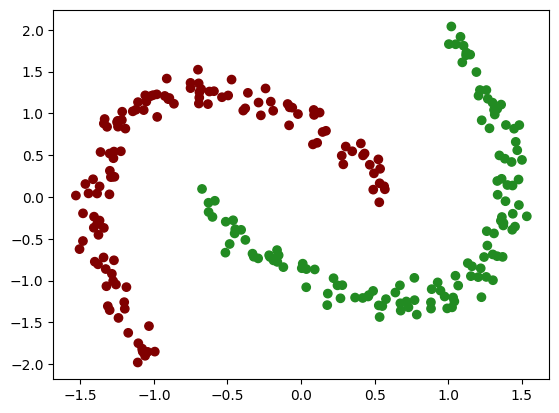

In [48]:
import numpy as np
import matplotlib.pyplot as plt
colors = ['maroon', 'forestgreen']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

plt.scatter(X_transformed[:,0], X_transformed[:,1], c=vectorizer(y))

In [49]:
from sklearn.manifold import Isomap

embedding = Isomap(n_components=2)
X_transformed = embedding.fit_transform(X)
X_transformed.shape

(250, 2)

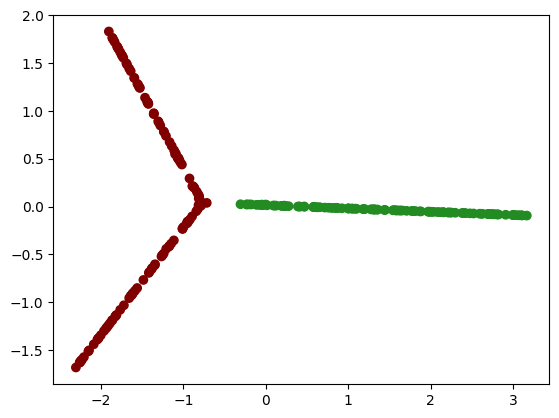

In [50]:
plt.scatter(X_transformed[:,0], X_transformed[:,1], c=vectorizer(y))

tsne

با استفاده از گراف و همسایگی این کار را انجام میدهد و هم نقاط دور را در از هم 

در نظر میگیرد لوکال و گلوبال را در نظر می گیرد

با استفاده از 

umap 

که سرعت پایین الگوریتم قبل را بهبود بخشیده  دیتای ماه را کاهش ابعاد دهید و در انتها با رسم پلات عملکرد ها را مقایسه کنید

(با هر دو الگوریتم این کار را انجام دهید)


In [51]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(X)
X_embedded.shape

(250, 2)

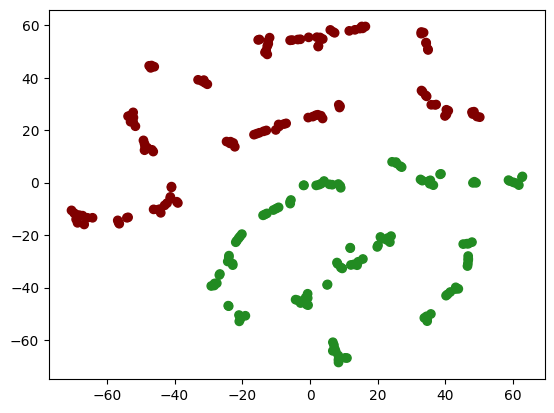

In [53]:
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=vectorizer(y))

In [ ]:
!pip install umap-learn

In [55]:
import umap
from sklearn.preprocessing import StandardScaler

reducer = umap.UMAP()

scaled_data = StandardScaler().fit_transform(X)
embedding = reducer.fit_transform(scaled_data)
embedding.shape

(250, 2)

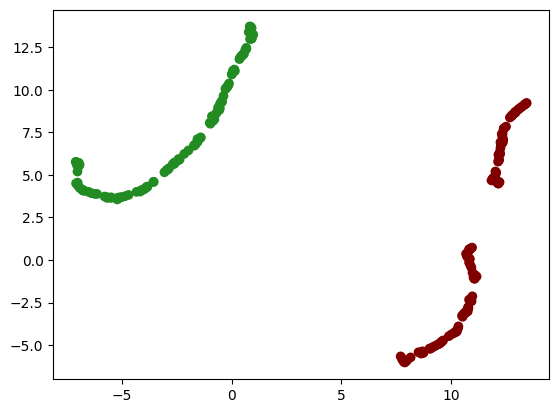

In [56]:
plt.scatter(embedding[:,0], embedding[:,1], c=vectorizer(y))

یک شبکه عصبی به صورت سریالی با کتابخانه کراس بسازید و آن را در فایلی سیو کنید

In [25]:
import tensorflow as tf

model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

from keras.models import load_model
model.save("network.h5")

linux

1- در لینوکس برای مخفی سازی از چی استفاده میشود و برای دید فایل های مخفی چه کلیدی در دستور

ls

استفاده میشود

2- آپشن های دستور زیر تحلیل کنید
ls -lahtr

-R رو هم توضیح دهید

3- در تصویر زیر منظور از فلش ها چیست

######## پاسخ

1- ابتدای نام فایل نقطه قرار داده می شود تا فایل مخفی شود- برای دیدن فایل های مخفی از کلید 

-a 

استفاده می شود

2- دستور ls همه فایل ها و دایرکتوری ها را لیست می کند

-a فایل های مخفی نمایش داده می شود

-l با جزئیات نمایش می دهد

-h حجم فایل ها را خوانا و با فرمت قابل خواندن برای انسان می کند 

-r ترتیب نمایش را برعکس می کند

-t مرتب سازی بر اساس تاریخ و زمان

-R list very long listing directory trees

3- منظور لینک است یعنی این فایل یک لینک(شبیه به شورت کات) به آدرس روبرویش است


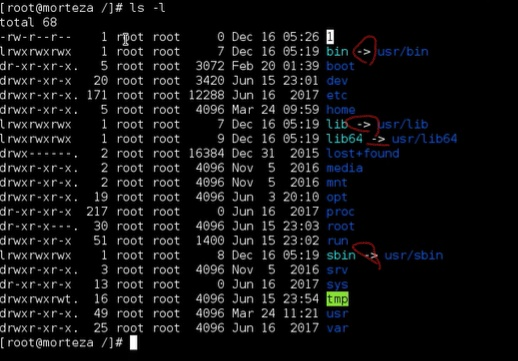
